# Dependence of the inland effect of a wave frequency

Relates to exercise 5 on page 47.

@olsthoorn, 2012-12-30

The solution for the partial differential equation

$$ kD \frac {\partial^2 s} {\partial x} = S \frac {\partial s} {\partial t} $$

Given the as a boundary condition $s(0, t) = A \sin(\omega t - \theta) $, met $\theta$ a constant, is

$$ s(x, t) = A e^{-a x} \sin(\omega t - ax - \theta) $$

with $\omega T = 2 \pi$ and

$$ a = \sqrt{ \frac {\omega S} {2 kD} } $$

To show the effect of frequency, we will superimpose a number of waves with frequencies taken as prime numbers, such that the will not coincied with one another. It is then expected that the larger $x$, the fewer frequeces will still be present and visible in the groundwater.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

kD = 600 # m2/d
S  = 0.1 # [-]
omega = np.array([1, 3, 5, 7, 11, 13, 17, 19, 23, 29]) / (2 * np.pi) # cycles per day
theta = np.random.rand(len(omega)) + 0.5
A = 1.0


Show the individual waves assuming they start at $y=0$ at $t=0$ ($\theta = 0$)

To do this we zip over the arrays omega and theta to get omega_ and theta_ as scalars in each cycle.

Then we plot the result for a single time and all values of $x$

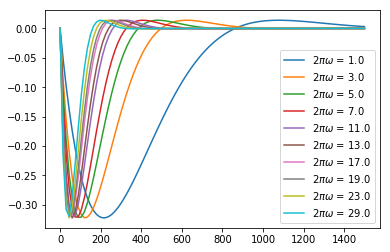

In [69]:
t = 0.35
x = np.linspace(0, 1500, 101)
for omega_, theta_ in zip(omega, theta):
    a = np.sqrt(omega_ * S / (2 * kD))
    y = A * np.exp(-a * x) * np.sin(omega_ * t * 0 - a * x + 0 * theta_)
    plt.plot(x, y, label="$2 \pi \omega$ = {:.1f}".format(omega_ * 2 * np.pi))
plt.legend()
plt.show()

Show the damping of the higher frequencies at different values of $x$.

For each value in the list x we plot the sum of the waves for all times.

We loop over the values in the array $x$.
Within tat loop, we loop over all waves, that is we zip over over all values in the arrays omega and theta
and add the result to the y that we already have.
When done plot the total $y$ (i.e. all waves superimposed) and add the label telling for which value $ x\_ $ in $x$ it is.

Finally plot a legend to show the labels and send the plot to the screen using plt.show().



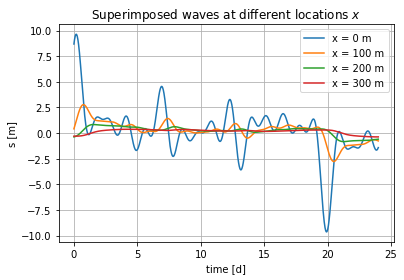

In [68]:
x = [0, 10, 50, 100, 200]
x =[ 0, 100, 200, 300]
t = 24 * np.linspace(0, 1, 24*60 + 1) # every minute

plt.title("Superimposed waves at different locations $x$")
plt.xlabel('time [d]')
plt.ylabel('s [m]')
plt.grid()

for x_ in x:
    y = np.zeros_like(t)
    for omega_, theta_ in zip(omega, theta):
        a = np.sqrt(omega_ * S /(2 * kD))
        y += A * np.exp(-a * x_) * np.sin(omega_ * t  -  a * x_ + theta_)
    plt.plot(t, y, label='x = {:.0f} m'.format(x_))
plt.legend()
plt.show()

In the plot, each wave is also delayed and more so the larger $x$. To remove this delay to better show the effect of filtering out the higher frequences, multiply $a$ by zero within the $\sin$ function.

We can also show the envelopes of the individual waves and even superimpose them.

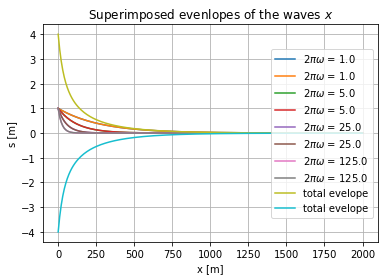

In [86]:
x = np.linspace(0, 2000, 201)
omega = np.array([1, 5, 25, 125]) / (2 * np.pi) # cycles per day

plt.title("Superimposed evenlopes of the waves $x$")
plt.xlabel('x [m]')
plt.ylabel('s [m]')
plt.grid()

y = np.zeros_like(x)
for omega_ in omega:
    a = np.sqrt(omega_ * S /(2 * kD))
    y_ = A * np.exp(-a * x)
    plt.plot(x, y_, x, y_, label="$2 \pi \omega$ = {:.1f}".format(omega_ * 2 * np.pi))
    y += y_
plt.plot(x, y, x, -y, label='total evelope')
plt.legend(loc='right')
plt.show()